# **Mô tả dữ liệu**
 Tập dữ liệu Brain Tumor gồm 4 loại khối u  :
   - Glioma : u thần kinh đệm
   - Meningioma : u màng não
   - Pituitary : u tuyến yên
   - Notumor : không có khối u

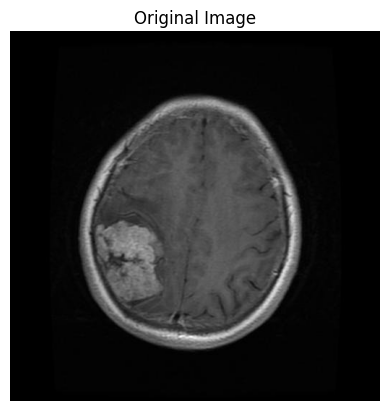

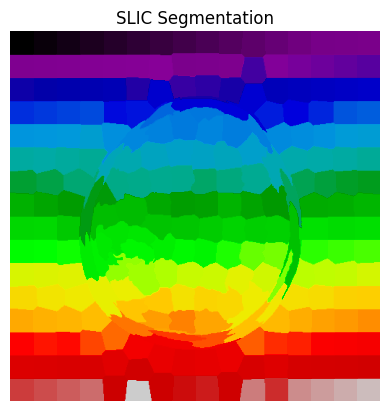

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


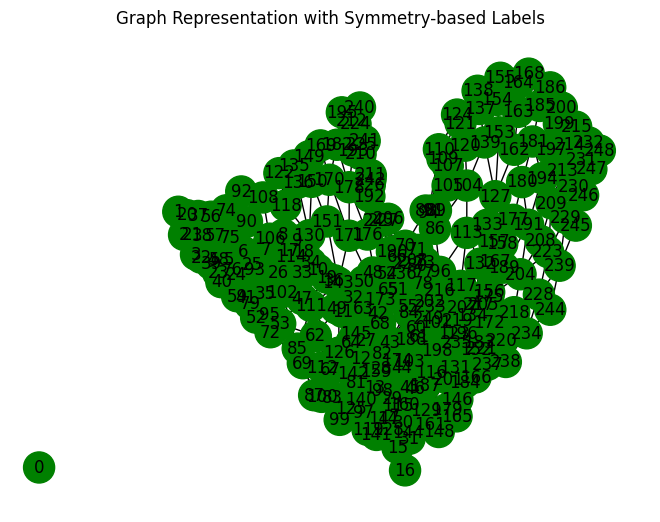

Số đỉnh: 250
Số cạnh: 734
(0, {'value': 0, 'symmetry_score': 0.0, 'status': 'normal'})
(1, {'value': 1, 'symmetry_score': 0.0, 'status': 'normal'})
(2, {'value': 2, 'symmetry_score': 0.0, 'status': 'normal'})
(3, {'value': 3, 'symmetry_score': 0.0, 'status': 'normal'})
(4, {'value': 4, 'symmetry_score': 0.0, 'status': 'normal'})
(5, {'value': 5, 'symmetry_score': 0.0, 'status': 'normal'})
(6, {'value': 6, 'symmetry_score': 0.0, 'status': 'normal'})
(7, {'value': 7, 'symmetry_score': 0.0, 'status': 'normal'})
(8, {'value': 8, 'symmetry_score': 0.0, 'status': 'normal'})
(9, {'value': 9, 'symmetry_score': 0.0, 'status': 'normal'})
(10, {'value': 10, 'symmetry_score': 0.0, 'status': 'normal'})
(11, {'value': 11, 'symmetry_score': 0.0, 'status': 'normal'})
(12, {'value': 12, 'symmetry_score': 0.0, 'status': 'normal'})
(13, {'value': 13, 'symmetry_score': 0.0, 'status': 'normal'})
(14, {'value': 14, 'symmetry_score': 0.0, 'status': 'normal'})
(15, {'value': 15, 'symmetry_score': 0.0, 'status

In [ ]:
import numpy as np
from skimage.segmentation import slic
from scipy.spatial.distance import cdist
import networkx as nx
from skimage import io
import matplotlib.pyplot as plt

# Tải và hiển thị hình ảnh
image = io.imread('/content/Tr-me_0010.jpg')
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Sử dụng SLIC để phân đoạn ảnh thành các siêu pixel
segments = slic(image, n_segments=250, compactness=15, sigma=1.5)

# Hiển thị kết quả phân đoạn
plt.imshow(segments, cmap='nipy_spectral')
plt.title("SLIC Segmentation")
plt.axis('off')
plt.show()

# Xây dựng đồ thị từ các siêu pixel
G = nx.Graph()
num_labels = np.max(segments) + 1

# Gán giá trị của siêu pixel cho các nút
for i in range(num_labels):
    G.add_node(i, value=i)  # Giá trị của node chính là chỉ số siêu pixel

# Thêm cạnh dựa trên sự liền kề giữa các siêu pixel
for (i, j), value in np.ndenumerate(segments):
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            ni, nj = i + di, j + dj
            if 0 <= ni < segments.shape[0] and 0 <= nj < segments.shape[1]:
                if segments[i, j] != segments[ni, nj]:
                    G.add_edge(segments[i, j], segments[ni, nj])

# Tính toán tính đối xứng theo trục dọc
def calculate_symmetry(segments):
    h, w = segments.shape
    symmetry_score = np.zeros(num_labels)
    for label in range(num_labels):
        mask = segments == label
        coords = np.column_stack(np.where(mask))
        if len(coords) == 0:
            continue
        mirrored_coords = np.copy(coords)
        mirrored_coords[:, 1] = w - mirrored_coords[:, 1] - 1  # Đối xứng theo trục dọc
        distances = np.abs(coords[:, 0] - mirrored_coords[:, 0])  # Khoảng cách theo chiều dọc
        symmetry_score[label] = distances.mean()
    return symmetry_score

symmetry_score = calculate_symmetry(segments)
threshold = np.median(symmetry_score)  # Ngưỡng để xác định bất thường

# Gán nhãn bình thường/bất thường dựa trên tính đối xứng
for node in G.nodes:
    G.nodes[node]['symmetry_score'] = symmetry_score[node]
    G.nodes[node]['status'] = 'abnormal' if symmetry_score[node] > threshold else 'normal'

# Vẽ đồ thị với nhãn
node_colors = ['red' if G.nodes[node]['status'] == 'abnormal' else 'green' for node in G.nodes]
pos = nx.spring_layout(G)  # Tạo vị trí cho các nút
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=500, cmap=plt.get_cmap('coolwarm'))
plt.title("Graph Representation with Symmetry-based Labels")
plt.show()

print("Số đỉnh:", num_labels)
print("Số cạnh:", G.number_of_edges())

# Hiển thị nhãn và giá trị của các nút
for node in G.nodes(data=True):
    print(node)

# **Khảo sát dữ liệu**
1. Trực quan hóa Tập dữ liệu

2. Hiển thị một số dữ liệu


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Số lượng hình ảnh với mỗi loại trong tập Train: [1321, 1339, 1595, 1457]
Số lượng hình ảnh với mỗi loại trong tập Test: [300, 306, 405, 300]


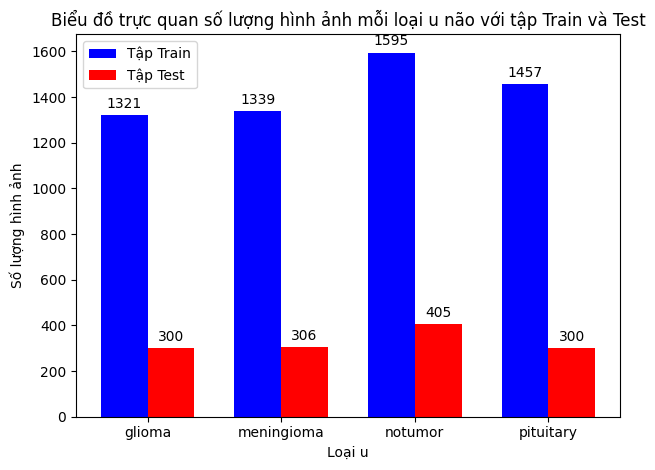

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os


import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Các loại u
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Hàm đếm số lượng hình ảnh trong mỗi loại
def count_images(data_dir):
    counts = []
    for category in categories:
        category_dir = os.path.join(data_dir, category)
        if not os.path.exists(category_dir):
            print(f"Folder {category} không tìm thấy trong {data_dir}")
            counts.append(0)
            continue
        image_files = os.listdir(category_dir)
        counts.append(len(image_files))
    return counts

train_dir = '/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Training'
test_dir = '/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Testing'

# Đếm số lượng hình ảnh trong mỗi loại cho tập train và test
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# In ra số lượng hình ảnh
print("Số lượng hình ảnh với mỗi loại trong tập Train:", train_counts)
print("Số lượng hình ảnh với mỗi loại trong tập Test:", test_counts)

# Thiết lập dữ liệu cho biểu đồ
x = np.arange(len(categories))  # Vị trí các loại u
width = 0.35  # Chiều rộng của các cột

# Vẽ biểu đồ
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_counts, width, label='Tập Train', color='blue')
rects2 = ax.bar(x + width/2, test_counts, width, label='Tập Test', color='red')

# Thêm các thông tin cho biểu đồ
ax.set_xlabel('Loại u')
ax.set_ylabel('Số lượng hình ảnh')
ax.set_title('Biểu đồ trực quan số lượng hình ảnh mỗi loại u não với tập Train và Test')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Thêm số lượng lên các cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


1 số hình ảnh điển hình


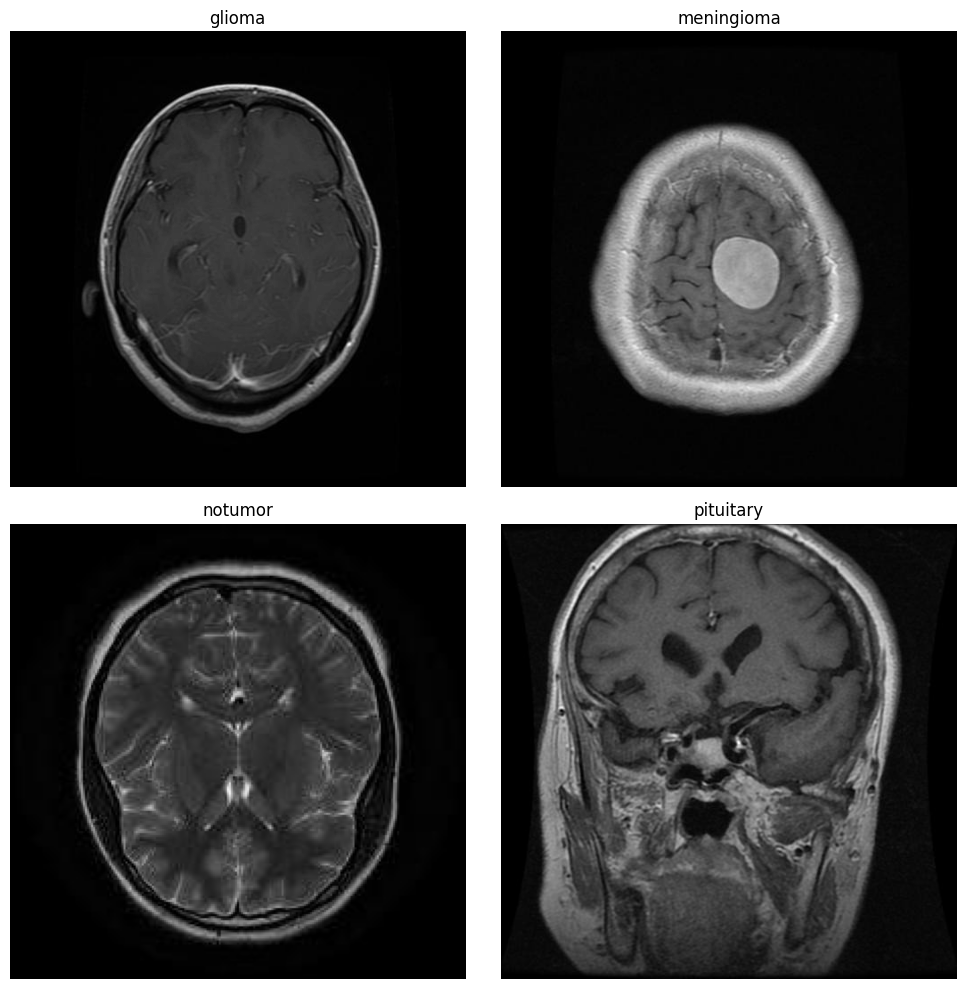

In [ ]:
def check_dataset_structure(data_dir):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    for idx, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        if not os.path.exists(category_dir):
            print(f"Folder {category} does not exist in {data_dir}")
            continue

        image_files = os.listdir(category_dir)


        if image_files:
            sample_image = os.path.join(category_dir, image_files[0])
            image = io.imread(sample_image)
            axs[idx].imshow(image, cmap='gray')
            axs[idx].set_title(f"{category}")
            axs[idx].axis('off')
        else:
            axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

print("1 số hình ảnh điển hình")
check_dataset_structure(train_dir)

In [ ]:
!pip install numpy scikit-image networkx dgl



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux20

# Tiền Xử Lý Dữ liệu
1 . Chuyển hình ảnh về đồ thị

2 . Tiền xử lý dữ liệu đồ thị.



In [ ]:
!pip install networkx

In [ ]:
!pip show networkx



Name: networkx
Version: 3.3
Summary: Python package for creating and manipulating graphs and networks
Home-page: 
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: hyperopt, python-louvain, scikit-image, torch


In [ ]:
!pip install --upgrade networkx

In [ ]:
!pip install torchdata
!pip install --upgrade dgl
!pip install dgl --no-binary dgl

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import os
import numpy as np
import dgl
from skimage import io
from skimage.segmentation import slic
import networkx as nx

def preprocess_mri(image_path, n_segments=1000):

    image = io.imread(image_path)


    if len(image.shape) > 2:
        image = np.mean(image, axis=2)


    image = (image - np.mean(image)) / np.std(image)


    segments = slic(image, n_segments=n_segments, compactness=10)

    return segments

def create_graph_from_segments(segments):

    g = dgl.DGLGraph()


    for segment_value in np.unique(segments):
        segment_indices = np.argwhere(segments == segment_value)
        for index in segment_indices:
            g.add_nodes(1, data={'segment': segment_value})

        for index1 in segment_indices:
            for index2 in segment_indices:
                if np.linalg.norm(np.array(index1) - np.array(index2)) == 1:
                    g.add_edge(int(index1), int(index2))

    return g

def save_preprocessed_data(input_dir, output_dir, n_segments=1000):
    os.makedirs(output_dir, exist_ok=True)

    categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

    for category in categories:
        category_input_dir = os.path.join(input_dir, category)
        category_output_dir = os.path.join(output_dir, category)
        os.makedirs(category_output_dir, exist_ok=True)

        for file_name in os.listdir(category_input_dir):
            if file_name.endswith('.jpg'):
                image_path = os.path.join(category_input_dir, file_name)
                segments = preprocess_mri(image_path, n_segments)
                graph = create_graph_from_segments(segments)


                base_name = os.path.basename(image_path).split('.')[0]
                np.save(os.path.join(category_output_dir, base_name + '_segments.npy'), segments)
                dgl.save_graphs(os.path.join(category_output_dir, base_name + '_graph.dgl'), [graph])


train_input_dir = '/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Training'
test_input_dir = '/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Testing'
train_output_dir = '/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Train_Preprocessed'
test_output_dir = '/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Test_Preprocessed'

save_preprocessed_data(train_input_dir, train_output_dir)
save_preprocessed_data(test_input_dir, test_output_dir)


ImportError: cannot import name 'DILL_AVAILABLE' from 'torch.utils.data.datapipes.utils.common' (/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/utils/common.py)

In [ ]:
class MRIGraphDataset(Dataset):
    def __init__(self, graph_dir):
        self.graph_files = [os.path.join(graph_dir, dir, f) for dir in os.listdir(graph_dir) for f in os.listdir(os.path.join(graph_dir, dir)) if f.endswith('_graph.gpickle')]

    def __len__(self):
        return len(self.graph_files)

    def __getitem__(self, idx):
        graph_file = self.graph_files[idx]
        graph = nx.read_gpickle(graph_file)
        dgl_graph = dgl.from_networkx(graph)
        dgl_graph.ndata['feat'] = torch.tensor([1.0] * dgl_graph.number_of_nodes())  # Thay thế với thuộc tính thực tế của bạn
        dgl_graph.ndata['label'] = torch.randint(0, 4, (dgl_graph.number_of_nodes(),))  # Thay thế với nhãn thực tế của bạn
        return dgl_graph

train_dataset = MRIGraphDataset('/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Train_Preprocessed')
test_dataset = MRIGraphDataset('/content/drive/MyDrive/TTCS - CÁ NHÂN /Colab Notebooks/Brain/Test_Preprocessed')

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class GNNModel(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, h_feats)
        self.conv2 = dglnn.GraphConv(h_feats, num_classes)

    def forward(self, g):
        h = self.conv1(g, g.ndata['feat'])
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

model = GNNModel(in_feats=1, h_feats=16, num_classes=4)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(100):
    model.train()
    for batched_graph in train_dataloader:
        logits = model(batched_graph)
        labels = batched_graph.ndata['label']
        loss = loss_fn(logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch} | Loss: {loss.item()}")

def evaluate(model, dataloader):
    model.eval()
    total_correct = 0
    total = 0
    with torch.no_grad():
        for batched_graph in dataloader:
            logits = model(batched_graph)
            labels = batched_graph.ndata['label']
            _, predicted = torch.max(logits, 1)
            total_correct += (predicted == labels).sum().item()
            total += len(labels)
    return total_correct / total

accuracy = evaluate(model, test_dataloader)
print(f"Test Accuracy: {accuracy}")